# Data source  
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

# Saranya 300321456 - Assignment 1


In [103]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as bsns


from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [104]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [105]:
#Path to take data
path = 'content/Assignment1_drug_consumption.txt'

In [106]:
# Data Classes
# There are 32 Classes and 1885 participants
dfmain=pd.read_csv(path,header=None)
print(dfmain.shape)
# Raw data form
dfmain.head(5)

(1885, 32)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [107]:
# Add Feature Names to the Data frame
COLUMN_NAMES=['Id','Age','Gender','Education','Country','Ethnicity','NScore','Escore','OScore','AScore',
              'CScore','Impulse','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke',
              'Crack','Ecstacy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semar','VSA']
dfmain.columns = COLUMN_NAMES

#Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')
dfmain.head(20)

,Id,Age,Gender,Education,Country,Ethnicity,NScore,Escore,OScore,AScore,CScore,Impulse,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semar,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [108]:
# Check for missing values - No Missing values 
dfmain.isna().sum()


Id           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
NScore       0
Escore       0
OScore       0
AScore       0
CScore       0
Impulse      0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstacy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semar        0
VSA          0
dtype: int64

In [109]:
## Split Training Features and output class
Xmain = dfmain[dfmain.columns[~dfmain.columns.isin(['Id'])]] # we are looking for all classes in dfmain which are not class]
Xmain.head(2)

,Age,Gender,Education,Country,Ethnicity,NScore,Escore,OScore,AScore,CScore,Impulse,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semar,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


In [110]:
# TADA !! Declaring the Classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Classifier intialization
DTclf = DecisionTreeClassifier()
RFclf = RandomForestClassifier()
SVMclf = SVC(kernel='rbf',random_state=4)
KNNclf = KNeighborsClassifier(n_neighbors=12)


# ALCOHOL 

In [111]:
# DF -- Alcohol
dfmainAlcohol  = pd.read_csv(path,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13]) 
dfmainAlcohol.columns = ['Age','Gender','Education','Country','Ethnicity',
                         'NScore','Escore','OScore','AScore','CScore',
                         'Impulse','SS','Alcohol'] 
dfmainAlcohol['Alcohol'] = dfmainAlcohol ['Alcohol'].apply(lambda x: '0' if (x == 'CL1' or x == 'CL0') else '1')
dfmainAlcohol.head(20)
dfmainAlcohol.groupby('Alcohol').mean()
# Create Box Plot
#dfmainAlcohol.boxplot(column='Age',by='Alcohol',grid=False)
#dfmainAlcohol.boxplot(column='Education',by='Alcohol',grid=False)

# Train and Test split 
y = dfmainAlcohol.iloc[:,12]
x = dfmainAlcohol.iloc[:,0:12]
from sklearn.model_selection import train_test_split
x_trainAlcohol , x_testAlcohol , y_trainAlcohol , y_testAlcohol  = train_test_split(x,y,test_size=0.33, random_state=0)



# 1) Feature selection Step using ANOVA


In [112]:
# Splitting Train and Test
noOfFeaturesSelected = 8
from sklearn.feature_selection import SelectKBest , f_classif

# ALCOHOL - Feature Selection - ANOVA F Mean 

In [113]:
selectorAlcohol = SelectKBest(f_classif, k=noOfFeaturesSelected)
selectorAlcohol.fit(x_trainAlcohol,y_trainAlcohol)
print (x_trainAlcohol.shape , x_testAlcohol.shape , y_trainAlcohol.shape , y_testAlcohol.shape)
selectorAlcohol.scores_

(1262, 12) (622, 12) (1262,) (622,)


array([9.4893176 , 2.88325849, 0.13686117, 2.35927047, 4.9943366 ,
       2.51113031, 0.42475636, 0.06076041, 2.99914681, 5.28561363,
       4.12050676, 8.97969818])

In [114]:
# Significant Features for Alcohol
cols = selectorAlcohol.get_support(indices=True)
print('\n' + 'No of Features after Selection:' + str(noOfFeaturesSelected ))
print(cols)
print('\n' + 'Selected  features : \n')
for i in cols:          
        print(dfmainAlcohol.columns[i])
      


No of Features after Selection:8
[ 0  1  4  5  8  9 10 11]

Selected  features : 

Age
Gender
Ethnicity
NScore
AScore
CScore
Impulse
SS


In [115]:
# picking subset for train and test

x_train_s_Alcohol = x_trainAlcohol.iloc[:,cols]
x_test_s_Alcohol = x_testAlcohol.iloc[:,cols]

### 2) MODEL Building and Training - CLASSIFIER (DT, RF,SVM,KNN) - DRUG "Alcohol" - Model Accuracy 

MODEL - Decision Tree - DRUG (Alcohol) - Model Accuracy (Selected Features) 0.9372990353697749
MODEL - Random Forest - DRUG (Alcohol) - Model Accuracy (Selected Features) 0.9710610932475884
MODEL - SVM - DRUG (Alcohol) - Model Accuracy (Selected Features) 0.9710610932475884
MODEL - KNN - DRUG (Alcohol) - Model Accuracy (Selected Features) 0.9710610932475884


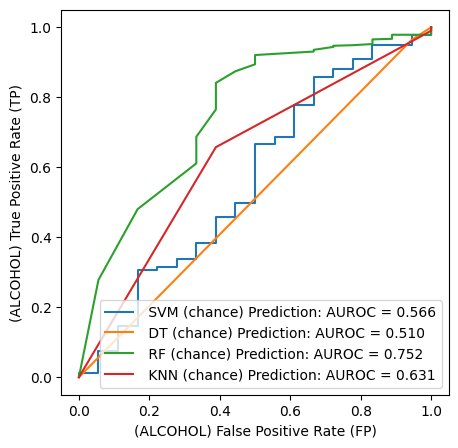

***********************CONFUSION MATRIX for the Selection feature set***************************************

Accuracy score (Decision Tree):-  0.9372990353697749

Accuracy score (Random Forest):-  0.9710610932475884

Accuracy score (SVM):-  0.9710610932475884

Accuracy score (KNN):-  0.9710610932475884

Confusion Matrix (Decision Tree):-  

[[  1  17]
 [ 22 582]]

Confusion Matrix (Random Forest):-  

[[  0  18]
 [  0 604]]

Confusion Matrix (SVM):-  

[[  0  18]
 [  0 604]]

Confusion Matrix (KNN):-  

[[  0  18]
 [  0 604]]

Classification Report:- 
Decision Tree 
              precision    recall  f1-score   support

           0       0.04      0.06      0.05        18
           1       0.97      0.96      0.97       604

    accuracy                           0.94       622
   macro avg       0.51      0.51      0.51       622
weighted avg       0.94      0.94      0.94       622

Random Forest 
              precision    recall  f1-score   support

           0       0.00      

In [173]:
from sklearn.metrics import roc_curve, auc

# Training Model with selected features 
DTclf.fit(x_train_s_Alcohol,y_trainAlcohol)
RFclf.fit(x_train_s_Alcohol,y_trainAlcohol)
KNNclf.fit(x_train_s_Alcohol,y_trainAlcohol)
SVMclf.fit(x_train_s_Alcohol,y_trainAlcohol)


y_predAlcoholDT  = DTclf.predict(x_test_s_Alcohol)
y_predAlcoholRF  = RFclf.predict(x_test_s_Alcohol)
y_predAlcoholKNN  = KNNclf.predict(x_test_s_Alcohol)
y_predAlcoholSVM  = SVMclf.predict(x_test_s_Alcohol)

print('MODEL - Decision Tree - DRUG (Alcohol) - Model Accuracy (Selected Features)', metrics.accuracy_score(y_testAlcohol,y_predAlcoholDT))
print('MODEL - Random Forest - DRUG (Alcohol) - Model Accuracy (Selected Features)', metrics.accuracy_score(y_testAlcohol,y_predAlcoholRF))
print('MODEL - SVM - DRUG (Alcohol) - Model Accuracy (Selected Features)', metrics.accuracy_score(y_testAlcohol,y_predAlcoholSVM))
print('MODEL - KNN - DRUG (Alcohol) - Model Accuracy (Selected Features)', metrics.accuracy_score(y_testAlcohol,y_predAlcoholKNN))


#x_trainAlcohol , x_testAlcohol , y_trainAlcohol , y_testAlcohol  = train_test_split(x,y,test_size=0.33, random_state=0)
# Perform Decision function for selected  features

y_decFncPred_DT =  DTclf.predict_proba(x_test_s_Alcohol)
y_decFncPred_DT =  y_decFncPred_DT[:,1]

y_decFncPred_RF =  RFclf.predict_proba(x_test_s_Alcohol)
y_decFncPred_RF =  y_decFncPred_RF[:,1]

y_decFncPred_SVM = SVMclf.decision_function(x_test_s_Alcohol)
y_decFncPred_KNN = KNNclf.predict_proba(x_test_s_Alcohol)
y_decFncPred_KNN =  y_decFncPred_KNN[:,1]

svm_fpr, svm_tpr , threshold = roc_curve(y_testAlcohol, y_decFncPred_SVM, pos_label='1')
auc_svm = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr , threshold = roc_curve(y_testAlcohol, y_decFncPred_DT, pos_label='1')
auc_dt = auc(dt_fpr, dt_tpr )

rf_fpr, rf_tpr , threshold = roc_curve(y_testAlcohol, y_decFncPred_RF, pos_label='1')
auc_rf = auc(rf_fpr, rf_tpr )

knn_fpr, knn_tpr , threshold = roc_curve(y_testAlcohol, y_decFncPred_KNN, pos_label='1')
auc_knn = auc(knn_fpr, knn_tpr )


plt.figure(figsize=(5,5) , dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle='-',label=' SVM (chance) Prediction: AUROC = %.3f' % auc_svm )
plt.plot(dt_fpr, dt_tpr, linestyle='-',label=' DT (chance) Prediction: AUROC = %.3f' % auc_dt )
plt.plot(rf_fpr, rf_tpr, linestyle='-',label=' RF (chance) Prediction: AUROC = %.3f' % auc_rf )
plt.plot(knn_fpr, knn_tpr, linestyle='-',label=' KNN (chance) Prediction: AUROC = %.3f' % auc_knn )

plt.xlabel('(ALCOHOL) False Positive Rate (FP)')
plt.ylabel('(ALCOHOL) True Positive Rate (TP)')

plt.legend()
plt.show()

# MODEL - CLASSIFIER (DT,RF,SVM,KNN) - DRUG (Alcohol) - Performance Metric (Selected Features) - Model Accuracy

from sklearn.metrics import accuracy_score
print('***********************CONFUSION MATRIX for the Selection feature set***************************************')
print ('\n' + 'Accuracy score (Decision Tree):- ' , accuracy_score(y_testAlcohol,y_predAlcoholDT))
print ('\n' + 'Accuracy score (Random Forest):- ' , accuracy_score(y_testAlcohol,y_predAlcoholRF))
print ('\n' + 'Accuracy score (SVM):- ' , accuracy_score(y_testAlcohol,y_predAlcoholSVM))
print ('\n' + 'Accuracy score (KNN):- ' , accuracy_score(y_testAlcohol,y_predAlcoholKNN))


from sklearn.metrics import confusion_matrix
print('\n'+'Confusion Matrix (Decision Tree):-  ' + '\n')
print(confusion_matrix(y_testAlcohol,y_predAlcoholDT))
print('\n'+'Confusion Matrix (Random Forest):-  ' + '\n')
print(confusion_matrix(y_testAlcohol,y_predAlcoholRF))
print('\n'+'Confusion Matrix (SVM):-  ' + '\n')
print(confusion_matrix(y_testAlcohol,y_predAlcoholSVM))
print('\n'+'Confusion Matrix (KNN):-  ' + '\n')
print(confusion_matrix(y_testAlcohol,y_predAlcoholKNN))


from sklearn.metrics import classification_report
print('\n'+'Classification Report:- ')
print('Decision Tree ' + '\n' + classification_report(y_testAlcohol,y_predAlcoholDT, zero_division=0))
print('Random Forest ' + '\n' + classification_report(y_testAlcohol,y_predAlcoholRF, zero_division=0))
print('SVM' + '\n' + classification_report(y_testAlcohol,y_predAlcoholSVM, zero_division=0))
print('KNN' + '\n' + classification_report(y_testAlcohol,y_predAlcoholKNN, zero_division=0))


# 3) Hyper Parameter Tuning for Decision Tree - Alcohol 

In [162]:


# Parallel learn with Research Paper - Decision Tree Tuning with Hyper Parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.experimental import enable_halving_search_cv 
clf = DecisionTreeClassifier()

#Using HyperParameters
parameters1 = { 'criterion' : ('gini','entropy')
               ,'max_depth' : (1,2,3,4,5,6,7,None)}

grid = GridSearchCV(clf , param_grid = parameters1 , cv = 10 , n_jobs = 1)

# Parallel learn with Research Paper 
grid.fit(x_train_s_Alcohol,y_trainAlcohol)

grid.best_estimator_
grid.best_params_ # Best paramters for Hyper tuning


{'criterion': 'gini', 'max_depth': 1}

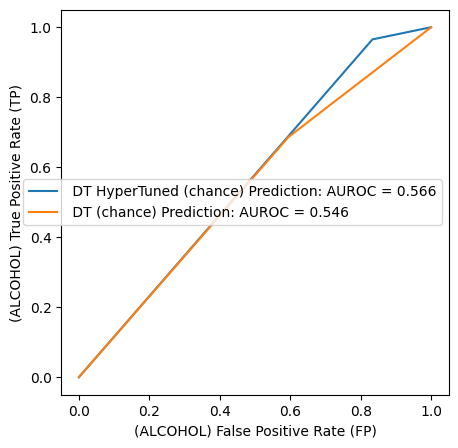


Accuracy score (Decision Tree Hyper Tuned):-  0.9421221864951769

Confusion Matrix (Decision Tree Hyper Tuned):-  

[[  3  15]
 [ 21 583]]
Decision Tree Hyper Tuned
              precision    recall  f1-score   support

           0       0.12      0.17      0.14        18
           1       0.97      0.97      0.97       604

    accuracy                           0.94       622
   macro avg       0.55      0.57      0.56       622
weighted avg       0.95      0.94      0.95       622



In [167]:
tuned_params = {'criterion': 'gini', 'max_depth': 2}
DTclf_HyperTuned = DecisionTreeClassifier()
DT_grid = RandomizedSearchCV(DTclf_HyperTuned,param_distributions = tuned_params , cv = 5 , verbose = True )

# Parallel learn with Research Paper 
DTclf_HyperTuned.fit(x_train_s_Alcohol,y_trainAlcohol)
# end

y_predAlcoholDTHT = DTclf_HyperTuned.predict(x_test_s_Alcohol)

y_decFncPred_DTHT =  DTclf_HyperTuned.predict_proba(x_test_s_Alcohol)
y_decFncPred_DTHT =  y_decFncPred_DTHT[:,1]


dt_fpr_ht, dt_tpr_ht , threshold = roc_curve(y_testAlcohol, y_decFncPred_DTHT, pos_label='1')
auc_dt_ht = auc(dt_fpr_ht, dt_tpr_ht )


plt.figure(figsize=(5,5) , dpi = 100)

plt.plot(dt_fpr_ht, dt_tpr_ht, linestyle='-',label=' DT HyperTuned (chance) Prediction: AUROC = %.3f' % auc_dt_ht )
plt.plot(dt_fpr, dt_tpr, linestyle='-',label=' DT (chance) Prediction: AUROC = %.3f' % auc_dt )
 

plt.xlabel('(ALCOHOL) False Positive Rate (FP)')
plt.ylabel('(ALCOHOL) True Positive Rate (TP)')

plt.legend()
plt.show()

print ('\n' + 'Accuracy score (Decision Tree Hyper Tuned):- ' , accuracy_score(y_testAlcohol,y_predAlcoholDTHT))

print('\n'+'Confusion Matrix (Decision Tree Hyper Tuned):-  ' + '\n')
print(confusion_matrix(y_testAlcohol,y_predAlcoholDTHT))

print('Decision Tree Hyper Tuned' + '\n' + classification_report(y_testAlcohol,y_predAlcoholDTHT, zero_division=0))

## VSA 

(1262, 12) (622, 12) (1262,) (622,)

 MODEL - CLASSIFIER (DT, RF,SVM,KNN) - DRUG (VSA) - Model Accuracy 
MODEL - Decision Tree - DRUG (VSA) - Model Accuracy 0.8263665594855305
MODEL - Random Forest - DRUG (VSA) - Model Accuracy 0.8520900321543409
MODEL - Support Vector Machine - DRUG (VSA) - Model Accuracy 0.8617363344051447
MODEL - KNearest Neigbours  - DRUG (VSA) - Model Accuracy 0.8536977491961415


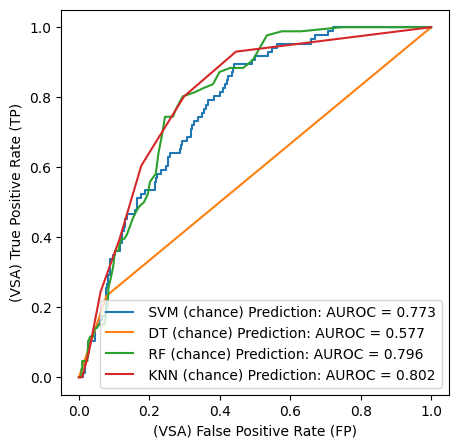

CONFUSION MATRIX for the Original feature set

Accuracy score (Decision Tree):-  0.8263665594855305

Accuracy score (Random Forest):-  0.8520900321543409

Accuracy score (SVM):-  0.8617363344051447

Accuracy score (KNN):-  0.8536977491961415

Confusion Matrix (Decision Tree):-  

[[494  42]
 [ 66  20]]

Confusion Matrix (Random Forest):-  

[[526  10]
 [ 82   4]]

Confusion Matrix (SVM):-  

[[536   0]
 [ 86   0]]

Confusion Matrix (KNN):-  

[[531   5]
 [ 86   0]]

Classification Report:- 
Decision Tree 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       536
           1       0.32      0.23      0.27        86

    accuracy                           0.83       622
   macro avg       0.60      0.58      0.59       622
weighted avg       0.80      0.83      0.81       622

Random Forest 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       536
           1       0.29      0.05     

In [176]:
# DF -- VSA
dfmainVSA  = pd.read_csv(path,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,31]) 
dfmainVSA.columns = ['Age','Gender','Education','Country','Ethnicity',
                         'NScore','Escore','OScore','AScore','CScore',
                         'Impulse','SS','VSA'] 
dfmainVSA['VSA'] = dfmainVSA ['VSA'].apply(lambda x: '0' if (x == 'CL1' or x == 'CL0') else '1')
dfmainVSA.head(20)
dfmainVSA.groupby('VSA').mean()
# Create Box Plot
#dfmainVSA.boxplot(column='Age',by='VSA',grid=False)
#dfmainVSA.boxplot(column='Education',by='VSA',grid=False)

# Train and Test split 
y = dfmainVSA.iloc[:,12]
x = dfmainVSA.iloc[:,0:12]
from sklearn.model_selection import train_test_split
x_trainVSA , x_testVSA , y_trainVSA , y_testVSA  = train_test_split(x,y,test_size=0.33, random_state=0)

# Splitting Train and Test
from sklearn.feature_selection import SelectKBest , f_classif
selectorVSA = SelectKBest(f_classif, k=noOfFeaturesSelected)
selectorVSA.fit(x_trainVSA,y_trainVSA)
print (x_trainVSA.shape , x_testVSA.shape , y_trainVSA.shape , y_testVSA.shape)


selectorVSA.scores_
# Significant Features for VSA
cols = selectorVSA.get_support(indices=True)
cols

# picking subset for train and test
x_trainVSA = x_trainVSA.iloc[:,cols]
x_testVSA = x_testVSA.iloc[:,cols]

# TADA !! Declaring the Classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Classifier intialization
DTclf_VSA = DecisionTreeClassifier()
RFclf_VSA = RandomForestClassifier()
SVMclf_VSA = SVC(kernel='rbf',random_state=4)
KNNclf_VSA = KNeighborsClassifier(n_neighbors=12)

### MODEL - CLASSIFIER (DT, RF,SVM,KNN) - DRUG (VSA) - Model Accuracy (Selected Features) - Model Accuracy
print('\n' + ' MODEL - CLASSIFIER (DT, RF,SVM,KNN) - DRUG (VSA) - Model Accuracy ')

from sklearn import metrics

# Training Data for Fitting
DTclf_VSA.fit(x_trainVSA,y_trainVSA)
RFclf_VSA.fit(x_trainVSA,y_trainVSA)
SVMclf_VSA.fit(x_trainVSA,y_trainVSA)
KNNclf_VSA.fit(x_trainVSA,y_trainVSA)

y_predVSADT = DTclf_VSA.predict(x_testVSA)
y_predVSARF = RFclf_VSA.predict(x_testVSA)
y_predVSASVM = SVMclf_VSA.predict(x_testVSA)
y_predVSAKNN = KNNclf_VSA.predict(x_testVSA)

print('MODEL - Decision Tree - DRUG (VSA) - Model Accuracy', metrics.accuracy_score(y_testVSA,y_predVSADT))
print('MODEL - Random Forest - DRUG (VSA) - Model Accuracy', metrics.accuracy_score(y_testVSA,y_predVSARF))
print('MODEL - Support Vector Machine - DRUG (VSA) - Model Accuracy', metrics.accuracy_score(y_testVSA,y_predVSASVM))
print('MODEL - KNearest Neigbours  - DRUG (VSA) - Model Accuracy', metrics.accuracy_score(y_testVSA,y_predVSAKNN))


#x_trainVSA , x_testVSA , y_trainVSA , y_testVSA  = train_test_split(x,y,test_size=0.33, random_state=0)
# Perform Decision function

y_decFncPred_DT_VSA =  DTclf_VSA.predict_proba(x_testVSA)
y_decFncPred_DT_VSA =  y_decFncPred_DT_VSA[:,1]

y_decFncPred_RF_VSA =  RFclf_VSA.predict_proba(x_testVSA)
y_decFncPred_RF_VSA =  y_decFncPred_RF_VSA[:,1]

y_decFncPred_SVM_VSA = SVMclf_VSA.decision_function(x_testVSA)
y_decFncPred_KNN_VSA = KNNclf_VSA.predict_proba(x_testVSA)
y_decFncPred_KNN_VSA =  y_decFncPred_KNN_VSA[:,1]

# plot ROC (Receiver operation curve) and Area under Curve AOC
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr , threshold = roc_curve(y_testVSA, y_decFncPred_SVM_VSA, pos_label='1')
auc_svm_1 = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr , threshold = roc_curve(y_testVSA, y_decFncPred_DT_VSA, pos_label='1')
auc_dt_1 = auc(dt_fpr, dt_tpr )

rf_fpr, rf_tpr , threshold = roc_curve(y_testVSA, y_decFncPred_RF_VSA, pos_label='1')
auc_rf_1 = auc(rf_fpr, rf_tpr )

knn_fpr, knn_tpr , threshold = roc_curve(y_testVSA, y_decFncPred_KNN_VSA, pos_label='1')
auc_knn_1 = auc(knn_fpr, knn_tpr )


plt.figure(figsize=(5,5) , dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle='-',label=' SVM (chance) Prediction: AUROC = %.3f' % auc_svm_1)
plt.plot(dt_fpr, dt_tpr, linestyle='-',label=' DT (chance) Prediction: AUROC = %.3f' % auc_dt_1 )
plt.plot(rf_fpr, rf_tpr, linestyle='-',label=' RF (chance) Prediction: AUROC = %.3f' % auc_rf_1 )
plt.plot(knn_fpr, knn_tpr, linestyle='-',label=' KNN (chance) Prediction: AUROC = %.3f' % auc_knn_1 )

plt.xlabel('(VSA) False Positive Rate (FP)')
plt.ylabel('(VSA) True Positive Rate (TP)')

plt.legend()
plt.show()


# MODEL - CLASSIFIER (DT,RF,SVM,KNN) - DRUG (VSA) - Performance Metric (All Features) - Model Accuracy

from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX for the Original feature set')
print ('\n' + 'Accuracy score (Decision Tree):- ' , accuracy_score(y_testVSA,y_predVSADT))
print ('\n' + 'Accuracy score (Random Forest):- ' , accuracy_score(y_testVSA,y_predVSARF))
print ('\n' + 'Accuracy score (SVM):- ' , accuracy_score(y_testVSA,y_predVSASVM))
print ('\n' + 'Accuracy score (KNN):- ' , accuracy_score(y_testVSA,y_predVSAKNN))

from sklearn.metrics import confusion_matrix
print('\n'+'Confusion Matrix (Decision Tree):-  ' + '\n')
print(confusion_matrix(y_testVSA,y_predVSADT))
print('\n'+'Confusion Matrix (Random Forest):-  ' + '\n')
print(confusion_matrix(y_testVSA,y_predVSARF))
print('\n'+'Confusion Matrix (SVM):-  ' + '\n')
print(confusion_matrix(y_testVSA,y_predVSASVM))
print('\n'+'Confusion Matrix (KNN):-  ' + '\n')
print(confusion_matrix(y_testVSA,y_predVSAKNN))

from sklearn.metrics import classification_report
print('\n'+'Classification Report:- ')
print('Decision Tree ' + '\n' + classification_report(y_testVSA,y_predVSADT, zero_division=0))
print('Random Forest ' + '\n' + classification_report(y_testVSA,y_predVSARF, zero_division=0))
print('SVM' + '\n' + classification_report(y_testVSA,y_predVSASVM, zero_division=0))
print('KNN' + '\n' + classification_report(y_testVSA,y_predVSAKNN, zero_division=0))


# Nicotine

(1262, 12) (622, 12) (1262,) (622,)

      MODEL - CLASSIFIER (DT, RF,SVM,KNN) - DRUG (Nicotine) - Model Accuracy 
MODEL - Decision Tree - DRUG (Nicotine) - Model Accuracy 0.6012861736334405
MODEL - Random Forest - DRUG (Nicotine) - Model Accuracy 0.7041800643086816
MODEL - Support Vector Machine - DRUG (Nicotine) - Model Accuracy 0.7315112540192926
MODEL - KNearest Neigbours  - DRUG (Nicotine) - Model Accuracy 0.6881028938906752


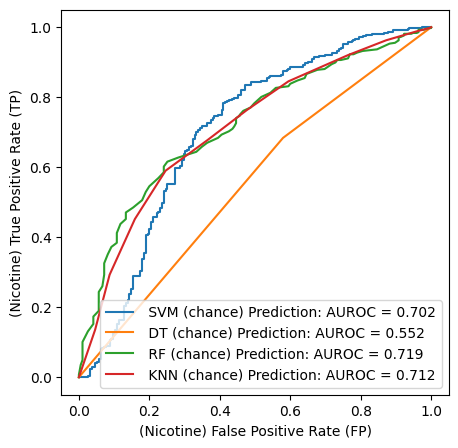

CONFUSION MATRIX for the Original feature set

Accuracy score (Decision Tree):-  0.6012861736334405

Accuracy score (Random Forest):-  0.7041800643086816

Accuracy score (SVM):-  0.7315112540192926

Accuracy score (KNN):-  0.6881028938906752

Confusion Matrix (Decision Tree):-  

[[ 82 113]
 [135 292]]

Confusion Matrix (Random Forest):-  

[[ 87 108]
 [ 76 351]]

Confusion Matrix (SVM):-  

[[ 89 106]
 [ 61 366]]

Confusion Matrix (KNN):-  

[[102  93]
 [101 326]]

Classification Report:- 
Decision Tree 
              precision    recall  f1-score   support

           0       0.38      0.42      0.40       195
           1       0.72      0.68      0.70       427

    accuracy                           0.60       622
   macro avg       0.55      0.55      0.55       622
weighted avg       0.61      0.60      0.61       622

Random Forest 
              precision    recall  f1-score   support

           0       0.53      0.45      0.49       195
           1       0.76      0.82     

In [177]:
# DF -- Nicotine
dfmainVSA  = pd.read_csv(path,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,29]) 
dfmainVSA.columns = ['Age','Gender','Education','Country','Ethnicity',
                         'NScore','Escore','OScore','AScore','CScore',
                         'Impulse','SS','Nicotine'] 
dfmainVSA['Nicotine'] = dfmainVSA ['Nicotine'].apply(lambda x: '0' if (x == 'CL1' or x == 'CL0') else '1')
dfmainVSA.head(20)
dfmainVSA.groupby('Nicotine').mean()
# Create Box Plot
#dfmainVSA.boxplot(column='Age',by='Nicotine',grid=False)
#dfmainVSA.boxplot(column='Education',by='Nicotine',grid=False)

# Train and Test split 
y = dfmainVSA.iloc[:,12]
x = dfmainVSA.iloc[:,0:12]
from sklearn.model_selection import train_test_split
x_trainNicotine , x_testNicotine , y_trainNicotine , y_testNicotine  = train_test_split(x,y,test_size=0.33, random_state=0)

# Splitting Train and Test
from sklearn.feature_selection import SelectKBest , f_classif
selectorNicotine = SelectKBest(f_classif, k=noOfFeaturesSelected)
selectorNicotine.fit(x_trainNicotine,y_trainNicotine)
print (x_trainNicotine.shape , x_testNicotine.shape , y_trainNicotine.shape , y_testNicotine.shape)


selectorNicotine.scores_
# Significant Features for Nicotine
cols = selectorNicotine.get_support(indices=True)
cols

# picking subset for train and test
x_trainNicotine = x_trainNicotine.iloc[:,cols]
x_testNicotine = x_testNicotine.iloc[:,cols]

# TADA !! Declaring the Classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Classifier intialization
DTclf_Nicotine = DecisionTreeClassifier()
RFclf_Nicotine = RandomForestClassifier()
SVMclf_Nicotine = SVC(kernel='rbf',random_state=4)
KNNclf_Nicotine = KNeighborsClassifier(n_neighbors=12)

### MODEL - CLASSIFIER (DT, RF,SVM,KNN) - DRUG (Nicotine) - Model Accuracy 
print('\n' + '      MODEL - CLASSIFIER (DT, RF,SVM,KNN) - DRUG (Nicotine) - Model Accuracy ' )

from sklearn import metrics

# Training Data for Fitting
DTclf_Nicotine.fit(x_trainNicotine,y_trainNicotine)
RFclf_Nicotine.fit(x_trainNicotine,y_trainNicotine)
SVMclf_Nicotine.fit(x_trainNicotine,y_trainNicotine)
KNNclf_Nicotine.fit(x_trainNicotine,y_trainNicotine)

y_predNicotineDT = DTclf_Nicotine.predict(x_testNicotine)
y_predNicotineRF = RFclf_Nicotine.predict(x_testNicotine)
y_predNicotineSVM = SVMclf_Nicotine.predict(x_testNicotine)
y_predNicotineKNN = KNNclf_Nicotine.predict(x_testNicotine)

print('MODEL - Decision Tree - DRUG (Nicotine) - Model Accuracy', metrics.accuracy_score(y_testNicotine,y_predNicotineDT))
print('MODEL - Random Forest - DRUG (Nicotine) - Model Accuracy', metrics.accuracy_score(y_testNicotine,y_predNicotineRF))
print('MODEL - Support Vector Machine - DRUG (Nicotine) - Model Accuracy', metrics.accuracy_score(y_testNicotine,y_predNicotineSVM))
print('MODEL - KNearest Neigbours  - DRUG (Nicotine) - Model Accuracy', metrics.accuracy_score(y_testNicotine,y_predNicotineKNN))


#x_trainNicotine , x_testNicotine , y_trainNicotine , y_testNicotine  = train_test_split(x,y,test_size=0.33, random_state=0)
# Perform Decision function

y_decFncPred_DT_2 =  DTclf_Nicotine.predict_proba(x_testNicotine)
y_decFncPred_DT_2 =  y_decFncPred_DT_2[:,1]

y_decFncPred_RF_2 =  RFclf_Nicotine.predict_proba(x_testNicotine)
y_decFncPred_RF_2 =  y_decFncPred_RF_2[:,1]

y_decFncPred_SVM_2 = SVMclf_Nicotine.decision_function(x_testNicotine)
y_decFncPred_KNN_2 = KNNclf_Nicotine.predict_proba(x_testNicotine)
y_decFncPred_KNN_2 =  y_decFncPred_KNN_2[:,1]

# plot ROC (Receiver operation curve) and Area under Curve AOC
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr , threshold = roc_curve(y_testNicotine, y_decFncPred_SVM_2, pos_label='1')
auc_svm = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr , threshold = roc_curve(y_testNicotine, y_decFncPred_DT_2, pos_label='1')
auc_dt = auc(dt_fpr, dt_tpr )

rf_fpr, rf_tpr , threshold = roc_curve(y_testNicotine, y_decFncPred_RF_2, pos_label='1')
auc_rf = auc(rf_fpr, rf_tpr )

knn_fpr, knn_tpr , threshold = roc_curve(y_testNicotine, y_decFncPred_KNN_2, pos_label='1')
auc_knn = auc(knn_fpr, knn_tpr )


plt.figure(figsize=(5,5) , dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle='-',label=' SVM (chance) Prediction: AUROC = %.3f' % auc_svm )
plt.plot(dt_fpr, dt_tpr, linestyle='-',label=' DT (chance) Prediction: AUROC = %.3f' % auc_dt )
plt.plot(rf_fpr, rf_tpr, linestyle='-',label=' RF (chance) Prediction: AUROC = %.3f' % auc_rf )
plt.plot(knn_fpr, knn_tpr, linestyle='-',label=' KNN (chance) Prediction: AUROC = %.3f' % auc_knn )

plt.xlabel('(Nicotine) False Positive Rate (FP)')
plt.ylabel('(Nicotine) True Positive Rate (TP)')

plt.legend()
plt.show()


# MODEL - CLASSIFIER (DT,RF,SVM,KNN) - DRUG (Nicotine) - Performance Metric (All Features) - Model Accuracy

from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX for the Original feature set')
print ('\n' + 'Accuracy score (Decision Tree):- ' , accuracy_score(y_testNicotine,y_predNicotineDT))
print ('\n' + 'Accuracy score (Random Forest):- ' , accuracy_score(y_testNicotine,y_predNicotineRF))
print ('\n' + 'Accuracy score (SVM):- ' , accuracy_score(y_testNicotine,y_predNicotineSVM))
print ('\n' + 'Accuracy score (KNN):- ' , accuracy_score(y_testNicotine,y_predNicotineKNN))

from sklearn.metrics import confusion_matrix
print('\n'+'Confusion Matrix (Decision Tree):-  ' + '\n')
print(confusion_matrix(y_testNicotine,y_predNicotineDT))
print('\n'+'Confusion Matrix (Random Forest):-  ' + '\n')
print(confusion_matrix(y_testNicotine,y_predNicotineRF))
print('\n'+'Confusion Matrix (SVM):-  ' + '\n')
print(confusion_matrix(y_testNicotine,y_predNicotineSVM))
print('\n'+'Confusion Matrix (KNN):-  ' + '\n')
print(confusion_matrix(y_testNicotine,y_predNicotineKNN))

from sklearn.metrics import classification_report
print('\n'+'Classification Report:- ')
print('Decision Tree ' + '\n' + classification_report(y_testNicotine,y_predNicotineDT, zero_division=0))
print('Random Forest ' + '\n' + classification_report(y_testNicotine,y_predNicotineRF, zero_division=0))
print('SVM' + '\n' + classification_report(y_testNicotine,y_predNicotineSVM, zero_division=0))
print('KNN' + '\n' + classification_report(y_testNicotine,y_predNicotineKNN, zero_division=0))


# Legal Highs

(1262, 12) (622, 12) (1262,) (622,)
MODEL - Decision Tree - DRUG (LegalH) - Model Accuracy 0.6977491961414791
MODEL - Random Forest - DRUG (LegalH) - Model Accuracy 0.792604501607717
MODEL - Support Vector Machine - DRUG (LegalH) - Model Accuracy 0.797427652733119
MODEL - KNearest Neigbours  - DRUG (LegalH) - Model Accuracy 0.7781350482315113


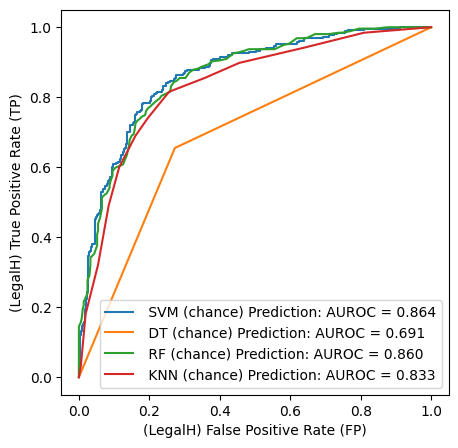

CONFUSION MATRIX for the Original feature set

Accuracy score (Decision Tree):-  0.6977491961414791

Accuracy score (Random Forest):-  0.792604501607717

Accuracy score (SVM):-  0.797427652733119

Accuracy score (KNN):-  0.7781350482315113

Confusion Matrix (Decision Tree):-  

[[267 100]
 [ 88 167]]

Confusion Matrix (Random Forest):-  

[[306  61]
 [ 68 187]]

Confusion Matrix (SVM):-  

[[311  56]
 [ 70 185]]

Confusion Matrix (KNN):-  

[[308  59]
 [ 79 176]]

Classification Report:- 
Decision Tree 
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       367
           1       0.63      0.65      0.64       255

    accuracy                           0.70       622
   macro avg       0.69      0.69      0.69       622
weighted avg       0.70      0.70      0.70       622

Random Forest 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       367
           1       0.75      0.73      0

In [178]:
# DF -- LegalH
dfmainLegalH  = pd.read_csv(path,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,25]) 
dfmainLegalH.columns = ['Age','Gender','Education','Country','Ethnicity',
                         'NScore','Escore','OScore','AScore','CScore',
                         'Impulse','SS','LegalH'] 
dfmainLegalH['LegalH'] = dfmainLegalH ['LegalH'].apply(lambda x: '0' if (x == 'CL1' or x == 'CL0') else '1')
dfmainLegalH.head(20)
dfmainLegalH.groupby('LegalH').mean()
# Create Box Plot
#dfmainLegalH.boxplot(column='Age',by='LegalH',grid=False)
#dfmainLegalH.boxplot(column='Education',by='LegalH',grid=False)

# Train and Test split 
y = dfmainLegalH.iloc[:,12]
x = dfmainLegalH.iloc[:,0:12]
from sklearn.model_selection import train_test_split
x_trainLegalH , x_testLegalH , y_trainLegalH , y_testLegalH  = train_test_split(x,y,test_size=0.33, random_state=0)

# Splitting Train and Test
from sklearn.feature_selection import SelectKBest , f_classif
selectorLegalH = SelectKBest(f_classif, k=noOfFeaturesSelected)
selectorLegalH.fit(x_trainLegalH,y_trainLegalH)
print (x_trainLegalH.shape , x_testLegalH.shape , y_trainLegalH.shape , y_testLegalH.shape)


selectorLegalH.scores_
# Significant Features for LegalH
cols = selectorLegalH.get_support(indices=True)
cols

# picking subset for train and test
x_train_s_LegalH = x_trainLegalH.iloc[:,cols]
x_test_s_LegalH = x_testLegalH.iloc[:,cols]

# TADA !! Declaring the Classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Classifier intialization
DTclf = DecisionTreeClassifier()
RFclf = RandomForestClassifier()
SVMclf = SVC(kernel='rbf',random_state=4)
KNNclf = KNeighborsClassifier(n_neighbors=12)

### MODEL - CLASSIFIER (DT, RF,SVM,KNN) - DRUG (LegalH) - Model Accuracy (Selected Features) - Model Accuracy


from sklearn import metrics

# Training Data for Fitting
DTclf.fit(x_trainLegalH,y_trainLegalH)
RFclf.fit(x_trainLegalH,y_trainLegalH)
SVMclf.fit(x_trainLegalH,y_trainLegalH)
KNNclf.fit(x_trainLegalH,y_trainLegalH)

y_predLegalHDT = DTclf.predict(x_testLegalH)
y_predLegalHRF = RFclf.predict(x_testLegalH)
y_predLegalHSVM = SVMclf.predict(x_testLegalH)
y_predLegalHKNN = KNNclf.predict(x_testLegalH)

print('MODEL - Decision Tree - DRUG (LegalH) - Model Accuracy', metrics.accuracy_score(y_testLegalH,y_predLegalHDT))
print('MODEL - Random Forest - DRUG (LegalH) - Model Accuracy', metrics.accuracy_score(y_testLegalH,y_predLegalHRF))
print('MODEL - Support Vector Machine - DRUG (LegalH) - Model Accuracy', metrics.accuracy_score(y_testLegalH,y_predLegalHSVM))
print('MODEL - KNearest Neigbours  - DRUG (LegalH) - Model Accuracy', metrics.accuracy_score(y_testLegalH,y_predLegalHKNN))


#x_trainLegalH , x_testLegalH , y_trainLegalH , y_testLegalH  = train_test_split(x,y,test_size=0.33, random_state=0)
# Perform Decision function

y_decFncPred_DT =  DTclf.predict_proba(x_testLegalH)
y_decFncPred_DT =  y_decFncPred_DT[:,1]

y_decFncPred_RF =  RFclf.predict_proba(x_testLegalH)
y_decFncPred_RF =  y_decFncPred_RF[:,1]

y_decFncPred_SVM = SVMclf.decision_function(x_testLegalH)
y_decFncPred_KNN = KNNclf.predict_proba(x_testLegalH)
y_decFncPred_KNN =  y_decFncPred_KNN[:,1]

# plot ROC (Receiver operation curve) and Area under Curve AOC
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr , threshold = roc_curve(y_testLegalH, y_decFncPred_SVM, pos_label='1')
auc_svm = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr , threshold = roc_curve(y_testLegalH, y_decFncPred_DT, pos_label='1')
auc_dt = auc(dt_fpr, dt_tpr )

rf_fpr, rf_tpr , threshold = roc_curve(y_testLegalH, y_decFncPred_RF, pos_label='1')
auc_rf = auc(rf_fpr, rf_tpr )

knn_fpr, knn_tpr , threshold = roc_curve(y_testLegalH, y_decFncPred_KNN, pos_label='1')
auc_knn = auc(knn_fpr, knn_tpr )


plt.figure(figsize=(5,5) , dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle='-',label=' SVM (chance) Prediction: AUROC = %.3f' % auc_svm )
plt.plot(dt_fpr, dt_tpr, linestyle='-',label=' DT (chance) Prediction: AUROC = %.3f' % auc_dt )
plt.plot(rf_fpr, rf_tpr, linestyle='-',label=' RF (chance) Prediction: AUROC = %.3f' % auc_rf )
plt.plot(knn_fpr, knn_tpr, linestyle='-',label=' KNN (chance) Prediction: AUROC = %.3f' % auc_knn )

plt.xlabel('(LegalH) False Positive Rate (FP)')
plt.ylabel('(LegalH) True Positive Rate (TP)')

plt.legend()
plt.show()


# MODEL - CLASSIFIER (DT,RF,SVM,KNN) - DRUG (LegalH) - Performance Metric (All Features) - Model Accuracy

from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX for the Original feature set')
print ('\n' + 'Accuracy score (Decision Tree):- ' , accuracy_score(y_testLegalH,y_predLegalHDT))
print ('\n' + 'Accuracy score (Random Forest):- ' , accuracy_score(y_testLegalH,y_predLegalHRF))
print ('\n' + 'Accuracy score (SVM):- ' , accuracy_score(y_testLegalH,y_predLegalHSVM))
print ('\n' + 'Accuracy score (KNN):- ' , accuracy_score(y_testLegalH,y_predLegalHKNN))

from sklearn.metrics import confusion_matrix
print('\n'+'Confusion Matrix (Decision Tree):-  ' + '\n')
print(confusion_matrix(y_testLegalH,y_predLegalHDT))
print('\n'+'Confusion Matrix (Random Forest):-  ' + '\n')
print(confusion_matrix(y_testLegalH,y_predLegalHRF))
print('\n'+'Confusion Matrix (SVM):-  ' + '\n')
print(confusion_matrix(y_testLegalH,y_predLegalHSVM))
print('\n'+'Confusion Matrix (KNN):-  ' + '\n')
print(confusion_matrix(y_testLegalH,y_predLegalHKNN))

from sklearn.metrics import classification_report
print('\n'+'Classification Report:- ')
print('Decision Tree ' + '\n' + classification_report(y_testLegalH,y_predLegalHDT, zero_division=0))
print('Random Forest ' + '\n' + classification_report(y_testLegalH,y_predLegalHRF, zero_division=0))
print('SVM' + '\n' + classification_report(y_testLegalH,y_predLegalHSVM, zero_division=0))
print('KNN' + '\n' + classification_report(y_testLegalH,y_predLegalHKNN, zero_division=0))


# Ecstacy, 

(1262, 12) (622, 12) (1262,) (622,)
MODEL - Decision Tree - DRUG (Ecstacy) - Model Accuracy 0.7041800643086816
MODEL - Random Forest - DRUG (Ecstacy) - Model Accuracy 0.7395498392282959
MODEL - Support Vector Machine - DRUG (Ecstacy) - Model Accuracy 0.747588424437299
MODEL - KNearest Neigbours  - DRUG (Ecstacy) - Model Accuracy 0.7186495176848875
MODEL - Decision Tree Hyper Tuned - DRUG (Ecstacy) - Model Accuracy 0.6913183279742765


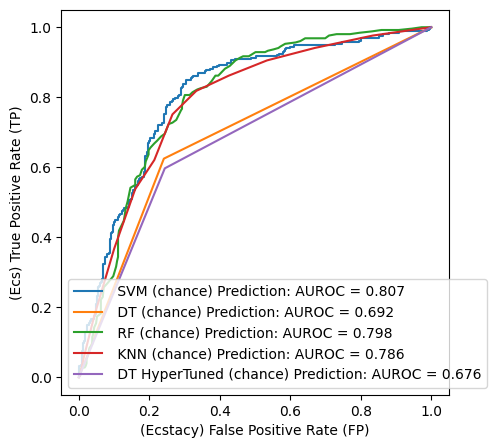

CONFUSION MATRIX for the Original feature set

Accuracy score (Decision Tree):-  0.7041800643086816

Accuracy score (Random Forest):-  0.7395498392282959

Accuracy score (SVM):-  0.747588424437299

Accuracy score (KNN):-  0.7186495176848875

Accuracy score (Decision Tree Hyper Tuned):-  0.409967845659164

Confusion Matrix (Decision Tree):-  

[[280  89]
 [ 95 158]]

Confusion Matrix (Decision Tree Hyper Tuned):-  

[[279  90]
 [102 151]]

Confusion Matrix (Random Forest):-  

[[294  75]
 [ 87 166]]

Confusion Matrix (SVM):-  

[[290  79]
 [ 78 175]]

Confusion Matrix (KNN):-  

[[290  79]
 [ 96 157]]

Classification Report:- 
Decision Tree 
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       369
           1       0.64      0.62      0.63       253

    accuracy                           0.70       622
   macro avg       0.69      0.69      0.69       622
weighted avg       0.70      0.70      0.70       622

Random Forest 
         

In [179]:
# DF -- Ecstacy
dfmainEcstacy  = pd.read_csv(path,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,22]) 
dfmainEcstacy.columns = ['Age','Gender','Education','Country','Ethnicity',
                         'NScore','Escore','OScore','AScore','CScore',
                         'Impulse','SS','Ecstacy'] 
dfmainEcstacy['Ecstacy'] = dfmainEcstacy ['Ecstacy'].apply(lambda x: '0' if (x == 'CL1' or x == 'CL0') else '1')
dfmainEcstacy.head(20)
dfmainEcstacy.groupby('Ecstacy').mean()
# Create Box Plot
#dfmainEcstacy.boxplot(column='Age',by='Ecstacy',grid=False)
#dfmainEcstacy.boxplot(column='Education',by='Ecstacy',grid=False)

# Train and Test split 
y = dfmainEcstacy.iloc[:,12]
x = dfmainEcstacy.iloc[:,0:12]
from sklearn.model_selection import train_test_split
x_trainEcstacy , x_testEcstacy , y_trainEcstacy , y_testEcstacy  = train_test_split(x,y,test_size=0.33, random_state=0)

# Splitting Train and Test
from sklearn.feature_selection import SelectKBest , f_classif
selectorEcstacy = SelectKBest(f_classif, k=noOfFeaturesSelected)
selectorEcstacy.fit(x_trainEcstacy,y_trainEcstacy)
print (x_trainEcstacy.shape , x_testEcstacy.shape , y_trainEcstacy.shape , y_testEcstacy.shape)

selectorEcstacy.scores_
# Significant Features for Ecstacy
cols = selectorEcstacy.get_support(indices=True)
cols
 
# picking subset for train and test
x_trainEcstacy = x_trainEcstacy.iloc[:,cols]
x_testEcstacy = x_testEcstacy.iloc[:,cols]
 
# TADA !! Declaring the Classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Classifier intialization
DTclf = DecisionTreeClassifier()
RFclf = RandomForestClassifier()
SVMclf = SVC(kernel='rbf',random_state=4)
KNNclf = KNeighborsClassifier(n_neighbors=12)


# Parallel learn with Research Paper - Decision Tree Tuning with Hyper Parameters
from sklearn.model_selection import RandomizedSearchCV
#Using HyperParameters
parameters = { 'max_depth' : (10,30)
              ,'criterion' : ('gini','entropy')
              ,'max_depth' : (3,5,7,9,10)
              ,'max_features' : ('sqrt','log2')
              ,'min_samples_split': (2,4,6)    
}
DTclf_HyperTuned = DecisionTreeClassifier()
DT_grid = RandomizedSearchCV(DTclf_HyperTuned,param_distributions = parameters , cv = 5 , verbose = True )

# End


### MODEL - CLASSIFIER (DT, RF,SVM,KNN) - DRUG (Ecstacy) - Model Accuracy (Selected Features) - Model Accuracy


from sklearn import metrics

# Training Data for Fitting
DTclf.fit(x_trainEcstacy,y_trainEcstacy)
RFclf.fit(x_trainEcstacy,y_trainEcstacy)
SVMclf.fit(x_trainEcstacy,y_trainEcstacy)
KNNclf.fit(x_trainEcstacy,y_trainEcstacy)

# Parallel learn with Research Paper 
DTclf_HyperTuned.fit(x_trainEcstacy,y_trainEcstacy)
# end

y_predEcstacyDT = DTclf.predict(x_testEcstacy)
y_predEcstacyRF = RFclf.predict(x_testEcstacy)
y_predEcstacySVM = SVMclf.predict(x_testEcstacy)
y_predEcstacyKNN = KNNclf.predict(x_testEcstacy)

y_predEcstacyDTHT = DTclf_HyperTuned.predict(x_testEcstacy)

print('MODEL - Decision Tree - DRUG (Ecstacy) - Model Accuracy', metrics.accuracy_score(y_testEcstacy,y_predEcstacyDT))
print('MODEL - Random Forest - DRUG (Ecstacy) - Model Accuracy', metrics.accuracy_score(y_testEcstacy,y_predEcstacyRF))
print('MODEL - Support Vector Machine - DRUG (Ecstacy) - Model Accuracy', metrics.accuracy_score(y_testEcstacy,y_predEcstacySVM))
print('MODEL - KNearest Neigbours  - DRUG (Ecstacy) - Model Accuracy', metrics.accuracy_score(y_testEcstacy,y_predEcstacyKNN))

print('MODEL - Decision Tree Hyper Tuned - DRUG (Ecstacy) - Model Accuracy', metrics.accuracy_score(y_testEcstacy,y_predEcstacyDTHT))
#x_trainEcstacy , x_testEcstacy , y_trainEcstacy , y_testEcstacy  = train_test_split(x,y,test_size=0.33, random_state=0)
# Perform Decision function

y_decFncPred_DT =  DTclf.predict_proba(x_testEcstacy)
y_decFncPred_DT =  y_decFncPred_DT[:,1]

y_decFncPred_RF =  RFclf.predict_proba(x_testEcstacy)
y_decFncPred_RF =  y_decFncPred_RF[:,1]

y_decFncPred_SVM = SVMclf.decision_function(x_testEcstacy)
y_decFncPred_KNN = KNNclf.predict_proba(x_testEcstacy)
y_decFncPred_KNN =  y_decFncPred_KNN[:,1]

y_decFncPred_DTHT =  DTclf_HyperTuned.predict_proba(x_testEcstacy)
y_decFncPred_DTHT =  y_decFncPred_DTHT[:,1]

# plot ROC (Receiver operation curve) and Area under Curve AOC
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr , threshold = roc_curve(y_testEcstacy, y_decFncPred_SVM, pos_label='1')
auc_svm = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr , threshold = roc_curve(y_testEcstacy, y_decFncPred_DT, pos_label='1')
auc_dt = auc(dt_fpr, dt_tpr )

rf_fpr, rf_tpr , threshold = roc_curve(y_testEcstacy, y_decFncPred_RF, pos_label='1')
auc_rf = auc(rf_fpr, rf_tpr )

knn_fpr, knn_tpr , threshold = roc_curve(y_testEcstacy, y_decFncPred_KNN, pos_label='1')
auc_knn = auc(knn_fpr, knn_tpr )

dt_fpr_ht, dt_tpr_ht , threshold = roc_curve(y_testEcstacy, y_decFncPred_DTHT, pos_label='1')
auc_dt_ht = auc(dt_fpr_ht, dt_tpr_ht )



plt.figure(figsize=(5,5) , dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle='-',label=' SVM (chance) Prediction: AUROC = %.3f' % auc_svm )
plt.plot(dt_fpr, dt_tpr, linestyle='-',label=' DT (chance) Prediction: AUROC = %.3f' % auc_dt )
plt.plot(rf_fpr, rf_tpr, linestyle='-',label=' RF (chance) Prediction: AUROC = %.3f' % auc_rf )
plt.plot(knn_fpr, knn_tpr, linestyle='-',label=' KNN (chance) Prediction: AUROC = %.3f' % auc_knn )

plt.plot(dt_fpr_ht, dt_tpr_ht, linestyle='-',label=' DT HyperTuned (chance) Prediction: AUROC = %.3f' % auc_dt_ht )

plt.xlabel('(Ecstacy) False Positive Rate (FP)')
plt.ylabel('(Ecs) True Positive Rate (TP)')

plt.legend()
plt.show()


# MODEL - CLASSIFIER (DT,RF,SVM,KNN) - DRUG (Ecstacy) - Performance Metric (All Features) - Model Accuracy

from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX for the Original feature set')
print ('\n' + 'Accuracy score (Decision Tree):- ' , accuracy_score(y_testEcstacy,y_predEcstacyDT))
print ('\n' + 'Accuracy score (Random Forest):- ' , accuracy_score(y_testEcstacy,y_predEcstacyRF))
print ('\n' + 'Accuracy score (SVM):- ' , accuracy_score(y_testEcstacy,y_predEcstacySVM))
print ('\n' + 'Accuracy score (KNN):- ' , accuracy_score(y_testEcstacy,y_predEcstacyKNN))

print ('\n' + 'Accuracy score (Decision Tree Hyper Tuned):- ' , accuracy_score(y_testAlcohol,y_predEcstacyDTHT))

from sklearn.metrics import confusion_matrix
print('\n'+'Confusion Matrix (Decision Tree):-  ' + '\n')
print(confusion_matrix(y_testEcstacy,y_predEcstacyDT))

print('\n'+'Confusion Matrix (Decision Tree Hyper Tuned):-  ' + '\n')
print(confusion_matrix(y_testEcstacy,y_predEcstacyDTHT))

print('\n'+'Confusion Matrix (Random Forest):-  ' + '\n')
print(confusion_matrix(y_testEcstacy,y_predEcstacyRF))
print('\n'+'Confusion Matrix (SVM):-  ' + '\n')
print(confusion_matrix(y_testEcstacy,y_predEcstacySVM))
print('\n'+'Confusion Matrix (KNN):-  ' + '\n')
print(confusion_matrix(y_testEcstacy,y_predEcstacyKNN))



from sklearn.metrics import classification_report
print('\n'+'Classification Report:- ')
print('Decision Tree ' + '\n' + classification_report(y_testEcstacy,y_predEcstacyDT, zero_division=0))
print('Random Forest ' + '\n' + classification_report(y_testEcstacy,y_predEcstacyRF, zero_division=0))
print('SVM' + '\n' + classification_report(y_testEcstacy,y_predEcstacySVM, zero_division=0))
print('KNN' + '\n' + classification_report(y_testEcstacy,y_predEcstacyKNN, zero_division=0))

print('Decision Tree Hyper Tuned ' + '\n' + classification_report(y_testEcstacy,y_predEcstacyDTHT, zero_division=0))


# Amphet

(1262, 12) (622, 12) (1262,) (622,)
MODEL - Decision Tree - DRUG (Amphet) - Model Accuracy 0.6495176848874598
MODEL - Random Forest - DRUG (Amphet) - Model Accuracy 0.7009646302250804
MODEL - Support Vector Machine - DRUG (Amphet) - Model Accuracy 0.702572347266881
MODEL - KNearest Neigbours  - DRUG (Amphet) - Model Accuracy 0.707395498392283


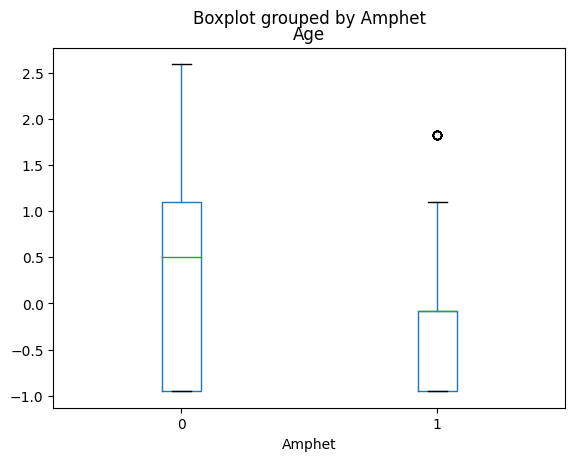

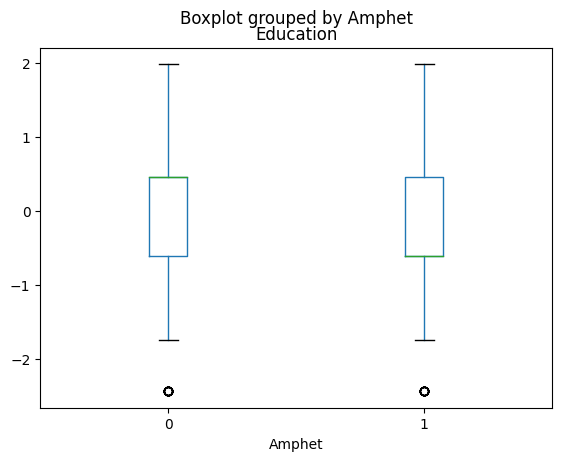

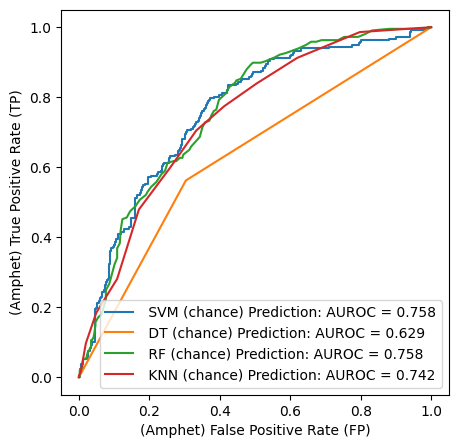

CONFUSION MATRIX for the Original feature set

Accuracy score (Decision Tree):-  0.6495176848874598

Accuracy score (Random Forest):-  0.7009646302250804

Accuracy score (SVM):-  0.702572347266881

Accuracy score (KNN):-  0.707395498392283

Confusion Matrix (Decision Tree):-  

[[282 123]
 [ 95 122]]

Confusion Matrix (Random Forest):-  

[[310  95]
 [ 91 126]]

Confusion Matrix (SVM):-  

[[304 101]
 [ 84 133]]

Confusion Matrix (KNN):-  

[[336  69]
 [113 104]]

Classification Report:- 
Decision Tree 
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       405
           1       0.50      0.56      0.53       217

    accuracy                           0.65       622
   macro avg       0.62      0.63      0.62       622
weighted avg       0.66      0.65      0.65       622

Random Forest 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       405
           1       0.57      0.58      0

In [180]:
# DF -- Amphet
dfmainAmphet  = pd.read_csv(path,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,14]) 
dfmainAmphet.columns = ['Age','Gender','Education','Country','Ethnicity',
                         'NScore','Escore','OScore','AScore','CScore',
                         'Impulse','SS','Amphet'] 
dfmainAmphet['Amphet'] = dfmainAmphet ['Amphet'].apply(lambda x: '0' if (x == 'CL1' or x == 'CL0') else '1')
dfmainAmphet.head(20)
dfmainAmphet.groupby('Amphet').mean()
# Create Box Plot
dfmainAmphet.boxplot(column='Age',by='Amphet',grid=False)
dfmainAmphet.boxplot(column='Education',by='Amphet',grid=False)

# Train and Test split 
y = dfmainAmphet.iloc[:,12]
x = dfmainAmphet.iloc[:,0:12]
from sklearn.model_selection import train_test_split
x_trainAmphet , x_testAmphet , y_trainAmphet , y_testAmphet  = train_test_split(x,y,test_size=0.33, random_state=0)

# Splitting Train and Test
from sklearn.feature_selection import SelectKBest , f_classif
selectorAmphet = SelectKBest(f_classif, k=noOfFeaturesSelected)
selectorAmphet.fit(x_trainAmphet,y_trainAmphet)
print (x_trainAmphet.shape , x_testAmphet.shape , y_trainAmphet.shape , y_testAmphet.shape)


selectorAmphet.scores_
# Significant Features for Amphet
cols = selectorAmphet.get_support(indices=True)
cols

# picking subset for train and test
x_trainAmphet = x_trainAmphet.iloc[:,cols]
x_testAmphet = x_testAmphet.iloc[:,cols]

# TADA !! Declaring the Classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Classifier intialization
DTclf = DecisionTreeClassifier()
RFclf = RandomForestClassifier()
SVMclf = SVC(kernel='rbf',random_state=4)
KNNclf = KNeighborsClassifier(n_neighbors=12)

### MODEL - CLASSIFIER (DT, RF,SVM,KNN) - DRUG (Amphet) - Model Accuracy (Selected Features) - Model Accuracy


from sklearn import metrics

# Training Data for Fitting
DTclf.fit(x_trainAmphet,y_trainAmphet)
RFclf.fit(x_trainAmphet,y_trainAmphet)
SVMclf.fit(x_trainAmphet,y_trainAmphet)
KNNclf.fit(x_trainAmphet,y_trainAmphet)

y_predAmphetDT = DTclf.predict(x_testAmphet)
y_predAmphetRF = RFclf.predict(x_testAmphet)
y_predAmphetSVM = SVMclf.predict(x_testAmphet)
y_predAmphetKNN = KNNclf.predict(x_testAmphet)

print('MODEL - Decision Tree - DRUG (Amphet) - Model Accuracy', metrics.accuracy_score(y_testAmphet,y_predAmphetDT))
print('MODEL - Random Forest - DRUG (Amphet) - Model Accuracy', metrics.accuracy_score(y_testAmphet,y_predAmphetRF))
print('MODEL - Support Vector Machine - DRUG (Amphet) - Model Accuracy', metrics.accuracy_score(y_testAmphet,y_predAmphetSVM))
print('MODEL - KNearest Neigbours  - DRUG (Amphet) - Model Accuracy', metrics.accuracy_score(y_testAmphet,y_predAmphetKNN))


#x_trainAmphet , x_testAmphet , y_trainAmphet , y_testAmphet  = train_test_split(x,y,test_size=0.33, random_state=0)
# Perform Decision function

y_decFncPred_DT =  DTclf.predict_proba(x_testAmphet)
y_decFncPred_DT =  y_decFncPred_DT[:,1]

y_decFncPred_RF =  RFclf.predict_proba(x_testAmphet)
y_decFncPred_RF =  y_decFncPred_RF[:,1]

y_decFncPred_SVM = SVMclf.decision_function(x_testAmphet)
y_decFncPred_KNN = KNNclf.predict_proba(x_testAmphet)
y_decFncPred_KNN =  y_decFncPred_KNN[:,1]

# plot ROC (Receiver operation curve) and Area under Curve AOC
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr , threshold = roc_curve(y_testAmphet, y_decFncPred_SVM, pos_label='1')
auc_svm = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr , threshold = roc_curve(y_testAmphet, y_decFncPred_DT, pos_label='1')
auc_dt = auc(dt_fpr, dt_tpr )

rf_fpr, rf_tpr , threshold = roc_curve(y_testAmphet, y_decFncPred_RF, pos_label='1')
auc_rf = auc(rf_fpr, rf_tpr )

knn_fpr, knn_tpr , threshold = roc_curve(y_testAmphet, y_decFncPred_KNN, pos_label='1')
auc_knn = auc(knn_fpr, knn_tpr )


plt.figure(figsize=(5,5) , dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle='-',label=' SVM (chance) Prediction: AUROC = %.3f' % auc_svm )
plt.plot(dt_fpr, dt_tpr, linestyle='-',label=' DT (chance) Prediction: AUROC = %.3f' % auc_dt )
plt.plot(rf_fpr, rf_tpr, linestyle='-',label=' RF (chance) Prediction: AUROC = %.3f' % auc_rf )
plt.plot(knn_fpr, knn_tpr, linestyle='-',label=' KNN (chance) Prediction: AUROC = %.3f' % auc_knn )

plt.xlabel('(Amphet) False Positive Rate (FP)')
plt.ylabel('(Amphet) True Positive Rate (TP)')

plt.legend()
plt.show()


# MODEL - CLASSIFIER (DT,RF,SVM,KNN) - DRUG (Amphet) - Performance Metric (All Features) - Model Accuracy

from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX for the Original feature set')
print ('\n' + 'Accuracy score (Decision Tree):- ' , accuracy_score(y_testAmphet,y_predAmphetDT))
print ('\n' + 'Accuracy score (Random Forest):- ' , accuracy_score(y_testAmphet,y_predAmphetRF))
print ('\n' + 'Accuracy score (SVM):- ' , accuracy_score(y_testAmphet,y_predAmphetSVM))
print ('\n' + 'Accuracy score (KNN):- ' , accuracy_score(y_testAmphet,y_predAmphetKNN))

from sklearn.metrics import confusion_matrix
print('\n'+'Confusion Matrix (Decision Tree):-  ' + '\n')
print(confusion_matrix(y_testAmphet,y_predAmphetDT))
print('\n'+'Confusion Matrix (Random Forest):-  ' + '\n')
print(confusion_matrix(y_testAmphet,y_predAmphetRF))
print('\n'+'Confusion Matrix (SVM):-  ' + '\n')
print(confusion_matrix(y_testAmphet,y_predAmphetSVM))
print('\n'+'Confusion Matrix (KNN):-  ' + '\n')
print(confusion_matrix(y_testAmphet,y_predAmphetKNN))

from sklearn.metrics import classification_report
print('\n'+'Classification Report:- ')
print('Decision Tree ' + '\n' + classification_report(y_testAmphet,y_predAmphetDT, zero_division=0))
print('Random Forest ' + '\n' + classification_report(y_testAmphet,y_predAmphetRF, zero_division=0))
print('SVM' + '\n' + classification_report(y_testAmphet,y_predAmphetSVM, zero_division=0))
print('KNN' + '\n' + classification_report(y_testAmphet,y_predAmphetKNN, zero_division=0))
